In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import pdb
import copy
from scipy import sparse
import anndata
import cerberus


p = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

In [70]:
h5 = '../cerberus_annot_triplets.h5'
filt_ab = '../cerberus_filtered_abundance.tsv'
ab = '../../talon/human_talon_abundance.tsv'
min_tpm = 1
gene_subset = 'polya'

In [68]:
def get_feat_psi(df, feat, **kwargs):
    
    # add feat type to kwargs
    kwargs['feat'] = feat
    
    # get tpm of each feature
    df, ids = get_tpm_table(df, **kwargs)
    
    # melt and remove entries that are unexpressed
    df = df.melt(ignore_index=False, var_name='dataset', value_name='tpm')
    df = df.loc[df.tpm >= min_tpm]
    df['gid_stable'] = get_gid_from_feat(df, 'index')
    df.reset_index(inplace=True)
    
    # sum up expression values
    total_df = df.copy(deep=True)
    total_df = total_df.groupby(['dataset', 'gid_stable']).sum().reset_index()
    
    # merge total into original df 
    df = df.merge(total_df, how='left',
                  on=['dataset', 'gid_stable'],
                  suffixes=('_'+feat, '_gene'))
    
    # actual psi calculation
    df['psi'] = df['tpm_'+feat] / df['tpm_gene']  
    
    return df

Calculating tss TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1633: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1632: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # tsss detected: 76487
# tsss >= 1 tpm: 67730
Applying gene type and novelty subset
Number of tsss reported: 64664
Calculating ic TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1633: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1632: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # ics detected: 149009
# ics >= 1 tpm: 135190
Applying gene type and novelty subset
Number of ics reported: 132071
Calculating tes TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1633: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1632: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # tess detected: 88726
# tess >= 1 tpm: 78398
Applying gene type and novelty subset
Number of tess reported: 75345


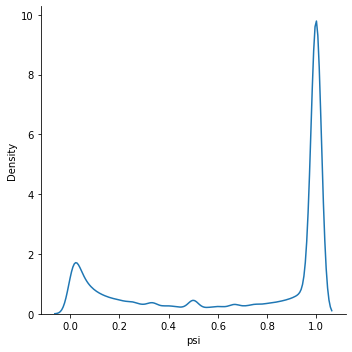

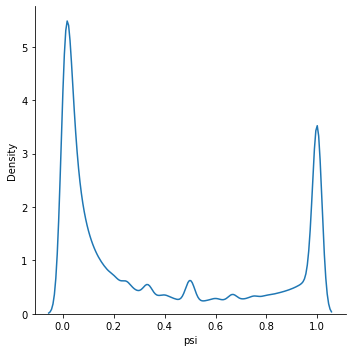

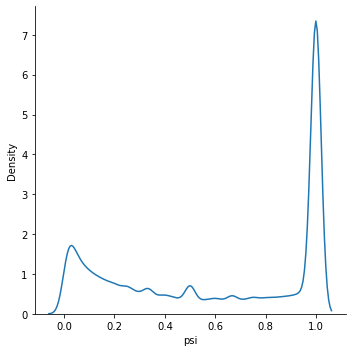

In [73]:
feats = ['tss', 'ic', 'tes']
for feat in feats:
    df = pd.read_csv(filt_ab, sep='\t')
    df = get_feat_psi(df, 
                      feat, 
                      how=feat, 
                      gene_subset=gene_subset,
                      min_tpm=min_tpm)
    
    # make a plot
    sns.displot(data=df, x='psi', kind='kde')    
    
    # save a file
    fname = '{}_psi.tsv'.format(feat)
    df.to_csv(fname, sep='\t', index=False)

In [67]:
feat = 'tss'
df = pd.read_csv(filt_ab, sep='\t')
df, ids = get_tpm_table(df,
                        feat=feat,
                        how=feat,
                        gene_subset='polya',
                        min_tpm=min_tpm)

Calculating tss TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1633: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1632: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # tsss detected: 76487
# tsss >= 1 tpm: 67730
Applying gene type and novelty subset
Number of tsss reported: 64664


In [60]:
total_df.head()

,dataset,gid_stable,tpm
0,a673_1_1,ENSG00000000003,126.714641
1,a673_1_1,ENSG00000000419,60.695248
2,a673_1_1,ENSG00000000457,4.259316
3,a673_1_1,ENSG00000000460,25.555894
4,a673_1_1,ENSG00000000971,2.129658


In [62]:
df.head()

,tss,dataset,tpm_tss,gid_stable,tpm_gene
0,ENSG00000000003_1,mcf7_1_1,33.719579,ENSG00000000003,33.719579
1,ENSG00000000419_1,mcf7_1_1,62.755882,ENSG00000000419,87.108911
2,ENSG00000000419_8,mcf7_1_1,24.353029,ENSG00000000419,87.108911
3,ENSG00000000457_1,mcf7_1_1,3.746620,ENSG00000000457,3.746620
4,ENSG00000000460_1,mcf7_1_1,13.113169,ENSG00000000460,18.733099


In [64]:
df.head()

,tss,dataset,tpm_tss,gid_stable,tpm_gene,psi
0,ENSG00000000003_1,mcf7_1_1,33.719579,ENSG00000000003,33.719579,1.00000
1,ENSG00000000419_1,mcf7_1_1,62.755882,ENSG00000000419,87.108911,0.72043
2,ENSG00000000419_8,mcf7_1_1,24.353029,ENSG00000000419,87.108911,0.27957
3,ENSG00000000457_1,mcf7_1_1,3.746620,ENSG00000000457,3.746620,1.00000
4,ENSG00000000460_1,mcf7_1_1,13.113169,ENSG00000000460,18.733099,0.70000


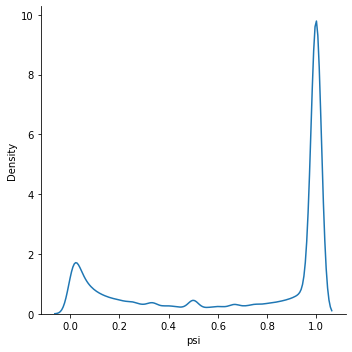

In [66]:
sns.displot(data=df, x='psi', kind='kde')